In [6]:
"""
Magic commands
"""
%matplotlib inline
%load_ext autoreload
%autoreload 2

"""
Python standard packages
"""
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

"""
packages for dataload and simulation
"""
import ffn # data access
from arch import arch_model  # simulation
from arch.univariate import SkewStudent, GARCH, EGARCH, ARX
"""
Own packages
"""
sys.path.insert(0, "C:\\code\\speciale\\") # vesl path
sys.path.insert(0, "C:\\Users\\lucas\\OneDrive\\Skrivebord\\repo\\speciale\\") # ljb path

import codelib  # used for extending pandas

"""
ignore warnings
"""
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load and manipulate data

In [11]:
prices = ffn.get('aapl,msft, fing-b.st', start = '2018-01-01')
returns = prices.to_returns().dropna()
log_returns = prices.to_log_returns().dropna()
cum_returns = prices.rebase()

Iteration:      1,   Func. Count:      9,   Neg. LLF: 76349.9561578942
Iteration:      2,   Func. Count:     22,   Neg. LLF: 130699.82357698987
Iteration:      3,   Func. Count:     33,   Neg. LLF: 111789.57657501253
Iteration:      4,   Func. Count:     43,   Neg. LLF: 67577.81527747448
Iteration:      5,   Func. Count:     52,   Neg. LLF: 4099.69807005345
Iteration:      6,   Func. Count:     61,   Neg. LLF: 4848.342327009306
Iteration:      7,   Func. Count:     70,   Neg. LLF: 7773.271630474378
Iteration:      8,   Func. Count:     80,   Neg. LLF: 2894.8589618282645
Iteration:      9,   Func. Count:     89,   Neg. LLF: 167248.64378406003
Iteration:     10,   Func. Count:     99,   Neg. LLF: 2892.9458303666643
Iteration:     11,   Func. Count:    107,   Neg. LLF: 2892.9415341325357
Iteration:     12,   Func. Count:    115,   Neg. LLF: 2892.9409655459017
Iteration:     13,   Func. Count:    123,   Neg. LLF: 2892.9409338163246
Iteration:     14,   Func. Count:    130,   Neg. LLF: 2892

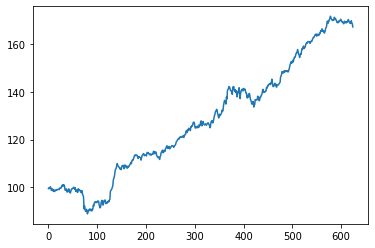

In [38]:
n_time_points = 525
prices = ffn.get('spy', start = '2010-01-01', end = '2020-01-01')

returns = prices.to_returns().dropna()
rs = np.random.RandomState([1])
dist = SkewStudent()
vol = GARCH()  # EGARCH()
lag = [1]  # [1, 2, 3, 4, 5]

am = ARX(returns * 100, lags=lag, volatility=vol, distribution=dist)
am_params = am.fit().params

simulation = am.simulate(params=am_params, nobs=(n_time_points + 100)) / 100
sim_prices = simulation.data.to_price_index().values.tolist()
plt.plot(sim_prices)

## Modelling and simulation

In [22]:
# FIT MODEL
rs = np.random.RandomState([0])

n_sims = 30
stock = 'aapl'
n_time_points = 1000

# Model specification
dist = SkewStudent(random_state = rs)
vol = EGARCH()
lag = [1, 2, 3, 4, 5]

# Model calibration
am = ARX(returns[stock] * 100, lags = lag, volatility = vol, distribution = dist)
am_fit = am.fit()
#am = arch_model(returns[stock] * 100, mean = "AR", vol = "garch", dist= skew_t) # fit garch model


# Model Simulation
fig, ax = plt.subplots(figsize = (12, 6))
ax.set(xlabel = "time", ylabel = "return")


for _ in range(n_sims):
    simulation = am.simulate(params = am_fit.params, nobs = n_time_points) / 100
    sim_prices = simulation.data.to_price_index()
    
    ax.plot(sim_prices, alpha = 30)

Iteration:      1,   Func. Count:     13,   Neg. LLF: 28779.899046160324
Iteration:      2,   Func. Count:     29,   Neg. LLF: 31790.684036207476
Iteration:      3,   Func. Count:     45,   Neg. LLF: 26757.050531541543
Iteration:      4,   Func. Count:     61,   Neg. LLF: 12491.57736322355
Iteration:      5,   Func. Count:     76,   Neg. LLF: 103751.94926655166
Iteration:      6,   Func. Count:     91,   Neg. LLF: 88665.70540568433
Iteration:      7,   Func. Count:    105,   Neg. LLF: 27765.813840316594
Iteration:      8,   Func. Count:    119,   Neg. LLF: 16294.975239299098
Iteration:      9,   Func. Count:    134,   Neg. LLF: 18769.53335632266
Iteration:     10,   Func. Count:    148,   Neg. LLF: 3859.88797457839
Iteration:     11,   Func. Count:    163,   Neg. LLF: 3081.684047334757
Iteration:     12,   Func. Count:    176,   Neg. LLF: 2090.1875161969233
Iteration:     13,   Func. Count:    189,   Neg. LLF: 2089.8296071115738
Iteration:     14,   Func. Count:    201,   Neg. LLF: 208

AttributeError: 'ARCHModelResult' object has no attribute 'simulate'

In [28]:
sim_prices[5]

104.41475917147136

## create features

In [21]:
sim_prices

dtype('float64')

In [8]:
df_test = pd.DataFrame({"price":sim_prices})

In [9]:
df_test.create_features()

,price,ma_5,ma_50
0,99.118440,NaN,NaN
1,102.336439,NaN,NaN
2,101.749408,NaN,NaN
3,103.612565,NaN,NaN
4,102.727014,101.908773,NaN
...,...,...,...
995,827.878245,824.999049,777.466262
996,832.949250,828.280738,779.862124
997,846.272848,832.733884,782.253482
998,857.981727,838.065906,784.233429
